In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
df = pd.read_csv("mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

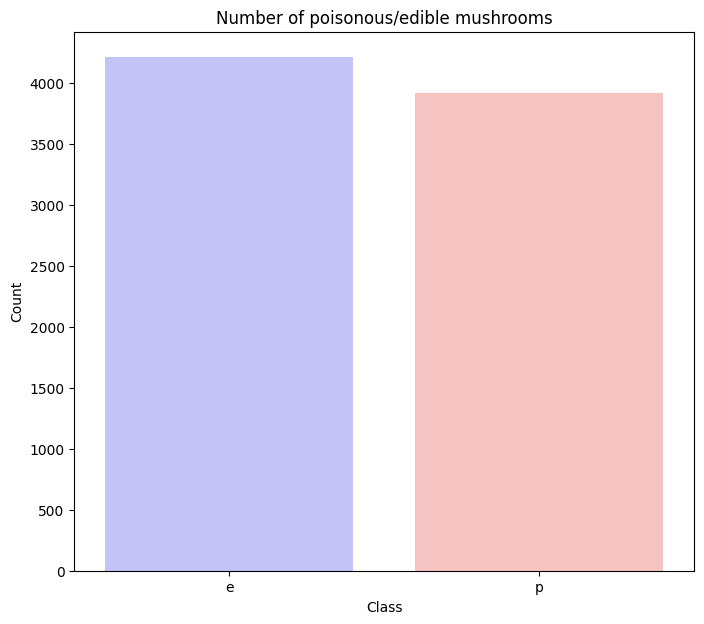

In [ ]:
count = df['class'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="bwr")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("count.jpeg", format='jpeg', dpi=300)
plt.show()

In [ ]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [ ]:
df.shape

(8124, 23)

In [ ]:
X = df.drop(['class'], axis=1)
y = df["class"]

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
labelencoder_x=LabelEncoder()
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])

labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


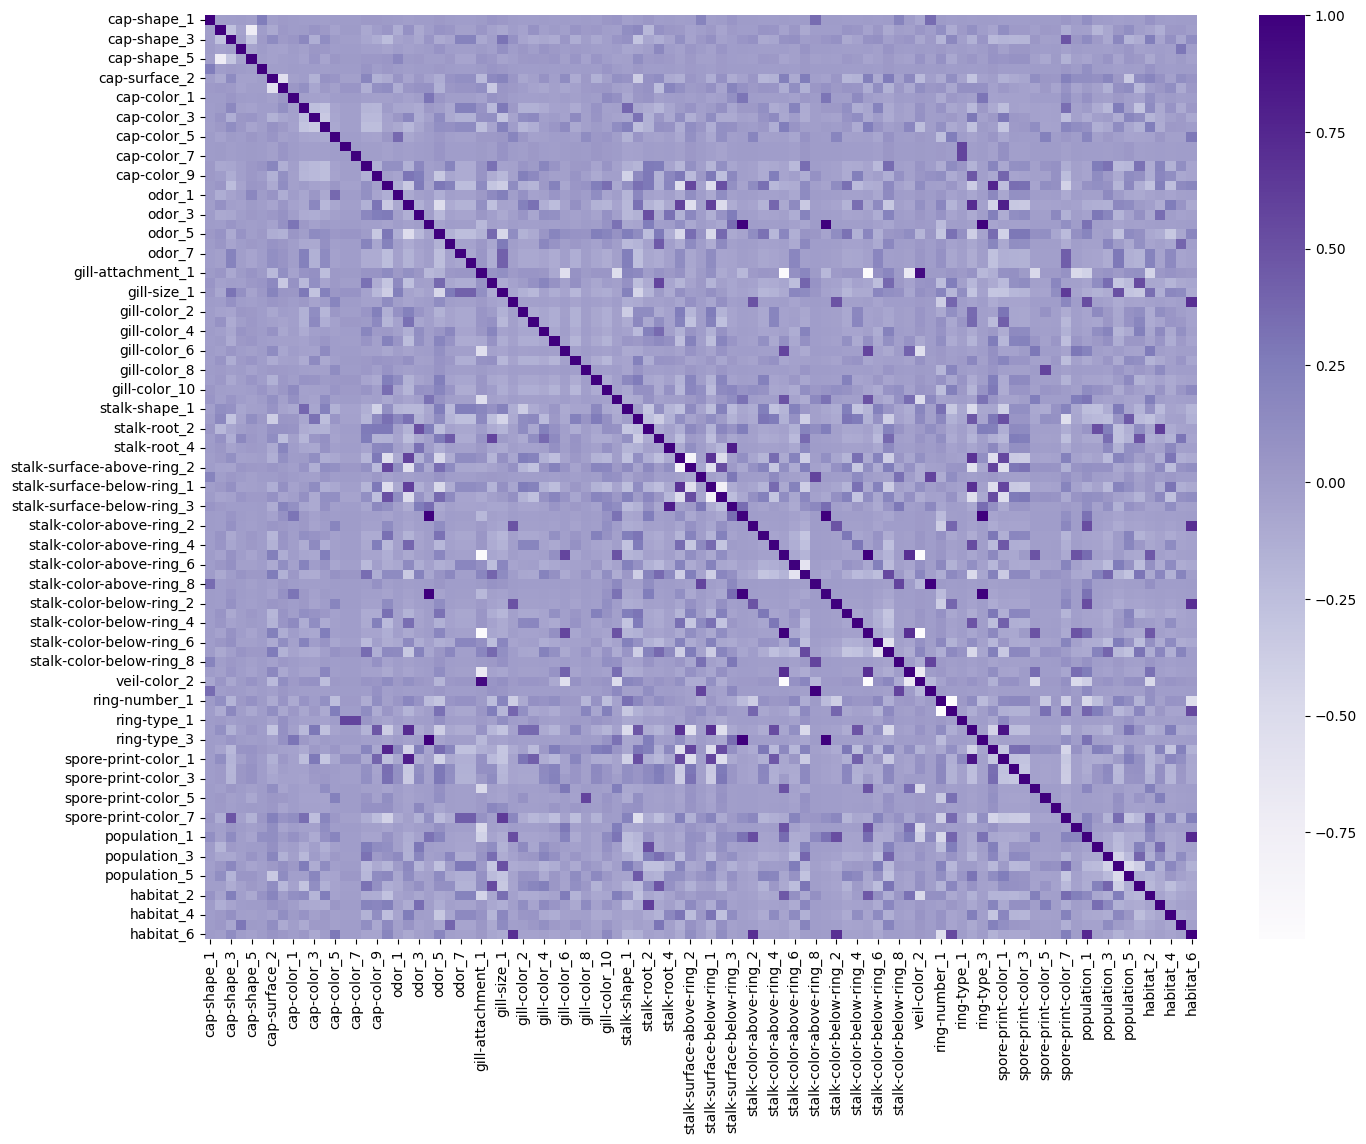

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(X.corr(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0);
#plt.savefig("corr2.jpeg", format='jpeg', dpi=300, bbox_inches='tight')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X2 = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (5686, 95)
Shape of PCA data: (5686, 2)


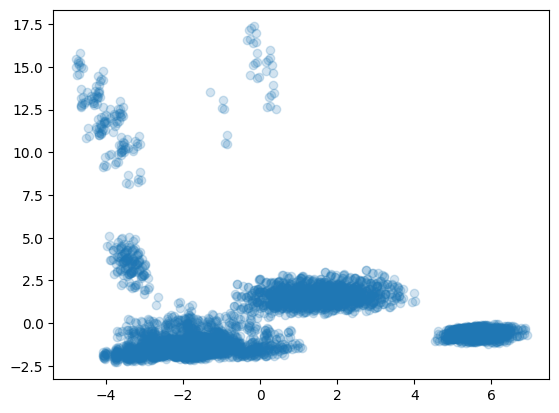

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2)

In [ ]:
import torch
from torch.autograd import Variable

data = pd.read_csv('mushrooms.csv')
train = data.copy()  # Make a copy of the dataset for training
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)


# Create Tensors to hold inputs and outputs, and wrap them in Variables
X = Variable(torch.Tensor(X_train).float())
Y = Variable(torch.Tensor(y_train).float())

# Define the number of neurons for input layer, hidden layer and output layer
input_neurons = 95
hidden_neurons = 1
#hidden_neurons = 3
output_neurons = 1
# Define learning rate and number of epoch on training
learning_rate = 1
num_epoch = 3000
# lambda for auxiliary term in cost function
lamb1 = 0
lamb2 = 0.001
# Threshold for classification
thresh = 0.4


# Define a customised neural network structure
net = torch.nn.Sequential(
    torch.nn.Linear(input_neurons, hidden_neurons, bias=False),
    #torch.nn.Tanh(),
    torch.nn.Linear(hidden_neurons, output_neurons, bias=False),
    torch.nn.Sigmoid()
)


class Loss(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, Y_pred, Y, net, lamb1, lamb2):
        for w in net.parameters():
            # Auxillary term
            c = lamb2 / 2 * torch.sum(w*w*(w-1)*(w-1)*(w+1)*(w+1))\
                + lamb1 / 2 * torch.sum(w*w)
            break

        new_loss = torch.nn.MSELoss()(Y_pred, Y) + c
        return new_loss


# Define loss function
loss_func = Loss()

# Define optimiser
child_counter = 0
for child in net.children():
    if child_counter == 1:
        for param in child.parameters():
            param.data = torch.ones([output_neurons, hidden_neurons])
            param.requires_grad = False
    elif child_counter == 0:
        optimiser = torch.optim.SGD(child.parameters(), lr=learning_rate)
    child_counter += 1

# Store all losses for visualisation
all_losses = []

# Train a neural network
for epoch in range(num_epoch):
    # Perform forward pass: compute predicted y by passing x to the model.
    Y_pred = net(X.view(-1, X.shape[1]))[:, 0]

    # Compute loss
    #lamb2 = epoch/num_epoch * (0.01-0.001) + 0.001
    loss = loss_func(Y_pred, Y, net, lamb1, lamb2)
    all_losses.append(loss.data)

    # Print progress
    if epoch % 200 == 0:
        # Convert three-column predicted Y values to one column for comparison
        #_, predicted = torch.max(F.softmax(Y_pred), 1)
        predicted = (torch.sign(Y_pred-thresh) + 1) / 2

        # Calculate and print accuracy
        total = predicted.size(0)
        correct = predicted.data.numpy() == Y.data.numpy()

        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.6f %%'
              % (epoch + 1, num_epoch, loss.data, 100 * sum(correct)/total))

    # Clear the gradients before running the backward pass.
    net.zero_grad()

    # Perform backward pass
    loss.backward()

    # Calling the step function on an Optimiser makes an update to its parameters
    optimiser.step()


for w_mat in net.parameters():
    a = torch.FloatTensor(w_mat.data)
    i = 0
    for w_row in w_mat:
        j = 0
        for w in w_row:
            if w.data.numpy() >= 0.3:
                a[i,j] = 1
            elif w.data.numpy() <= -0.3:
                a[i,j] = -1
            else:
                a[i,j] = 0
            j += 1
        i += 1
    w_mat.data = a


Y_pred = net(X)[:,0]
loss = loss_func(Y_pred, Y, net, lamb1, lamb2)
predicted = (torch.sign(Y_pred-thresh) + 1) / 2

# Calculate and print accuracy
total = predicted.size(0)
correct = predicted.data.numpy() == Y.data.numpy()

print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.6f %%'
      % (epoch + 1, num_epoch, loss.data, 100 * sum(correct)/total))

# Save weights
torch.save(net.state_dict(), 'net_weights')

Epoch [1/3000] Loss: 0.3206  Accuracy: 37.249384 %
Epoch [201/3000] Loss: 0.0025  Accuracy: 99.964826 %
Epoch [401/3000] Loss: 0.0020  Accuracy: 99.964826 %
Epoch [601/3000] Loss: 0.0018  Accuracy: 99.964826 %
Epoch [801/3000] Loss: 0.0016  Accuracy: 99.964826 %
Epoch [1001/3000] Loss: 0.0014  Accuracy: 99.964826 %
Epoch [1201/3000] Loss: 0.0013  Accuracy: 99.964826 %
Epoch [1401/3000] Loss: 0.0012  Accuracy: 99.964826 %
Epoch [1601/3000] Loss: 0.0011  Accuracy: 99.964826 %
Epoch [1801/3000] Loss: 0.0011  Accuracy: 99.964826 %
Epoch [2001/3000] Loss: 0.0011  Accuracy: 99.964826 %
Epoch [2201/3000] Loss: 0.0011  Accuracy: 99.964826 %
Epoch [2401/3000] Loss: 0.0011  Accuracy: 99.964826 %
Epoch [2601/3000] Loss: 0.0011  Accuracy: 99.964826 %
Epoch [2801/3000] Loss: 0.0011  Accuracy: 99.964826 %
Epoch [3000/3000] Loss: 0.0102  Accuracy: 99.788955 %


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install  sklearn-genetic
from genetic_selection import GeneticSelectionCV

data = pd.read_csv('mushrooms.csv')
train = data.copy()  # Make a copy of the dataset for training
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize the Genetic Algorithm-based feature selector
ga_selector = GeneticSelectionCV(estimator=dt_classifier,
                                 cv=5,
                                 verbose=1,
                                 scoring="accuracy",
                                 max_features=5,
                                 n_population=50,
                                 crossover_proba=0.5,
                                 mutation_proba=0.2,
                                 n_generations=40,
                                 crossover_independent_proba=0.5,
                                 mutation_independent_proba=0.05,
                                 tournament_size=3,
                                 n_gen_no_change=10,
                                 caching=True,
                                 n_jobs=-1)

# Fit the GA selector to the training data
ga_selector = ga_selector.fit(X_train, y_train)

# Transform the dataset
X_train_selected = ga_selector.transform(X_train)
X_test_selected = ga_selector.transform(X_test)

# Fit the Decision Tree Classifier on the selected features
dt_classifier.fit(X_train_selected, y_train)

# Predict the test set
predictions = dt_classifier.predict(X_test_selected)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	50    	[ 0.635247  3.14      0.009763]	[ 0.102042  1.456159  0.004626]	[ 0.518994  1.        0.000169]	[ 0.910656  5.        0.01991 ]
1  	36    	[-2399.431711     4.84      2400.006758]	[ 4271.150653     2.730275  4270.827503]	[-10000.            1.            0.000169]	[     0.910656     14.        10000.      ]
2  	36    	[-4399.561661     6.14      4400.004447]	[ 4964.258005     2.912113  4963.865516]	[-10000.            1.            0.000169]	[     0.910656     14.        10000.      ]
3  	25    	[-2999.427782     5.6       3000.005433]	[ 4582.9503       2.2       4582.572138]	[-10000.            2.            0.003763]	[     0.910656     13.        10000.      ]
4  	26    	[-2599.376322     5.42      2600.005454]	[ 4386.712125     2.442048  4386.339207]	[-10000.            2.            0.003763]